In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
data = pd.read_csv('musk_csv.csv')

In [180]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [181]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,6598.0,3299.500000,1904.822870,1.0,1650.25,3299.5,4948.75,6598.0
f1,6598.0,58.945135,53.249007,-31.0,37.00,44.0,53.00,292.0
f2,6598.0,-119.128524,90.813375,-199.0,-193.00,-149.0,-95.00,95.0
f3,6598.0,-73.146560,67.956235,-167.0,-137.00,-99.0,-19.00,81.0
f4,6598.0,-0.628372,80.444617,-114.0,-70.00,-25.0,42.00,161.0
...,...,...,...,...,...,...,...,...
f163,6598.0,201.760230,59.526751,73.0,166.00,191.0,215.00,625.0
f164,6598.0,-47.488330,55.069365,-289.0,-68.00,-60.0,-45.00,295.0
f165,6598.0,-150.259927,76.019023,-428.0,-179.00,-150.0,-120.00,168.0
f166,6598.0,41.770233,94.116085,-471.0,-9.00,27.0,119.00,367.0


In [182]:
data.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [183]:
data.shape

(6598, 170)

In [184]:
data = data.drop(columns='conformation_name',inplace=False, axis = 1)
data = data.drop(columns='molecule_name',inplace=False, axis = 1)
data.shape

(6598, 168)

In [185]:
X = data.drop(['class'], axis=1)
y = data['class']
X.shape, y.shape

((6598, 167), (6598,))

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [188]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
#MinMaxScalar(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [190]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[1412    0]
 [   0  238]]


In [191]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1412
           1       1.00      1.00      1.00       238

    accuracy                           1.00      1650
   macro avg       1.00      1.00      1.00      1650
weighted avg       1.00      1.00      1.00      1650



In [192]:
len(mlp.coefs_)

4

In [193]:
len(mlp.coefs_[0])

167

In [194]:
len(mlp.intercepts_[0])

30

In [195]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge

In [196]:
train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha", np.logspace(-7, 3, 3),cv=5)
train_scores, valid_scores

(array([[1.        , 0.84724539, 0.8399379 , 0.76552453, 0.84735276],
        [1.        , 0.84724539, 0.8399379 , 0.76552453, 0.84735276],
        [1.        , 0.84723895, 0.8399346 , 0.76551841, 0.8473464 ]]),
 array([[-3.35643564,  0.        ,  0.        ,  0.        ,  0.        ],
        [-3.35643564,  0.        ,  0.        ,  0.        ,  0.        ],
        [-3.35643564,  0.        ,  0.        ,  0.        ,  0.        ]]))

In [197]:
N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 25
N_BATCH = 150
N_CLASSES = np.unique(y_train)

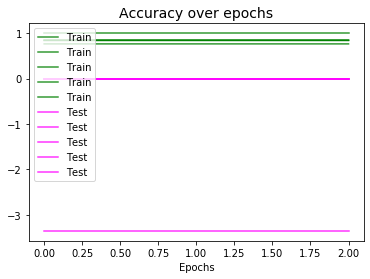

In [198]:
plt.plot(train_scores, color='green', alpha=0.8, label='Train')
plt.plot(valid_scores, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

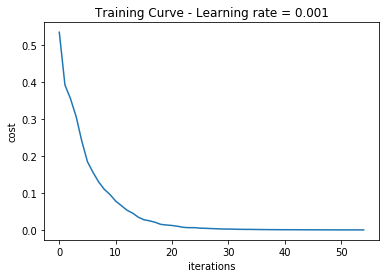

In [199]:
clf = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1500, solver='adam')
clf.fit(X_train,y_train)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Training Curve - Learning rate = " + str(0.001))
plt.plot(mlp.loss_curve_)
plt.show()

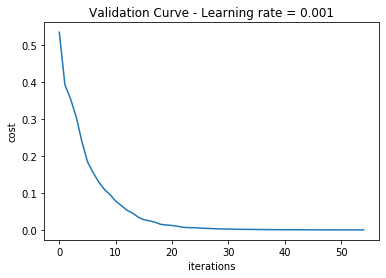

In [200]:
clf.fit(X_test,y_test)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Validation Curve - Learning rate = " + str(0.001))
plt.plot(mlp.loss_curve_)
plt.show()

In [201]:
confusion = confusion_matrix(y_test,predictions)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[1412    0]
 [   0  238]]


In [202]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,roc_curve,roc_auc_score  
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, predictions))

1.0
1.0


In [203]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - accuracy_score(y_test, predictions))

0.0
0.0


In [204]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(recall_score(y_test, predictions))

1.0
1.0


In [205]:
specificity = TN / (TN + FP)
print(specificity)

1.0


In [206]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.0
0.0


In [207]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, predictions))

1.0
1.0


Text(0, 0.5, 'Frequency')

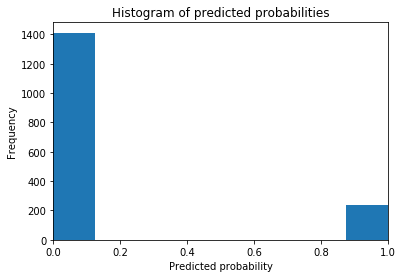

In [208]:
plt.hist(predictions, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

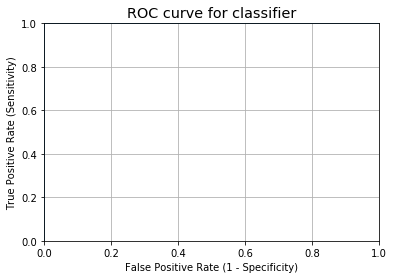

In [209]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [210]:
print(roc_auc_score(y_test, predictions))

1.0
